<a href="https://colab.research.google.com/github/ravi-annaswamy/tamil-ebook-recipes/blob/master/OCR_Tamil_PDFs_using_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code to OCR a Tamil PDF book using Tesseract. 

### Example by Ravi Annaswamy 
### October 2019

## Step 1. Install tesseract OCR

In [1]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 7s (720 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../tesseract-o

In [2]:
!tesseract -v

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


## Step 2. Install additional language packs, such as -tam

In [3]:
!apt-get install tesseract-ocr-tam

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-tam
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,070 kB of archives.
After this operation, 3,253 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-tam all 4.00~git24-0e00fe6-1.2 [1,070 kB]
Fetched 1,070 kB in 2s (488 kB/s)
Selecting previously unselected package tesseract-ocr-tam.
(Reading database ... 131230 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-tam_4.00~git24-0e00fe6-1.2_all.deb ...
Unpacking tesseract-ocr-tam (4.00~git24-0e00fe6-1.2) ...
Setting up tesseract-ocr-tam (4.00~git24-0e00fe6-1.2) ...


In [4]:
!ls -ltr /usr/share/tesseract-ocr/4.00/tessdata/tam.traineddata

-rw-r--r-- 1 root root 3237963 Sep 15  2017 /usr/share/tesseract-ocr/4.00/tessdata/tam.traineddata


## Step 3. Upload your pdf 
### (or read it from your google drive - not shown here.)

In [0]:
from google.colab import files

In [7]:
files.upload()

Saving TVA_BOK_0000119_UVS_Naan_Kandathum_Kettathum.pdf to TVA_BOK_0000119_UVS_Naan_Kandathum_Kettathum.pdf


## Step 4. Extract images using Fitz

In [8]:
!pip install PyMuPDF

     |████████████████████████████████| 5.3MB 2.5MB/s 


In [0]:
import fitz

In [0]:
  fname = 'TVA_BOK_0000119_UVS_Naan_Kandathum_Kettathum.pdf'  
  doc = fitz.open(fname)
    for i in range(len(doc)):
        for img in doc.getPageImageList(i):
            xref = img[0]  # check if this xref was handled already?
            pix = fitz.Pixmap(doc, xref)
            if pix.n < 5:  # this is GRAY or RGB
                pix.writePNG("p%s.png" % (i))
            else:  # CMYK needs to be converted to RGB first
                pix1 = fitz.Pixmap(fitz.csRGB, pix)  # make RGB pixmap copy
                pix1.writePNG("p%s.png" % (i))
                pix1 = None  # release storage early (optional)
            pix = None  # release storage early (optional)

## Step 5. Display the image.

In [0]:
# import the necessary packages
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

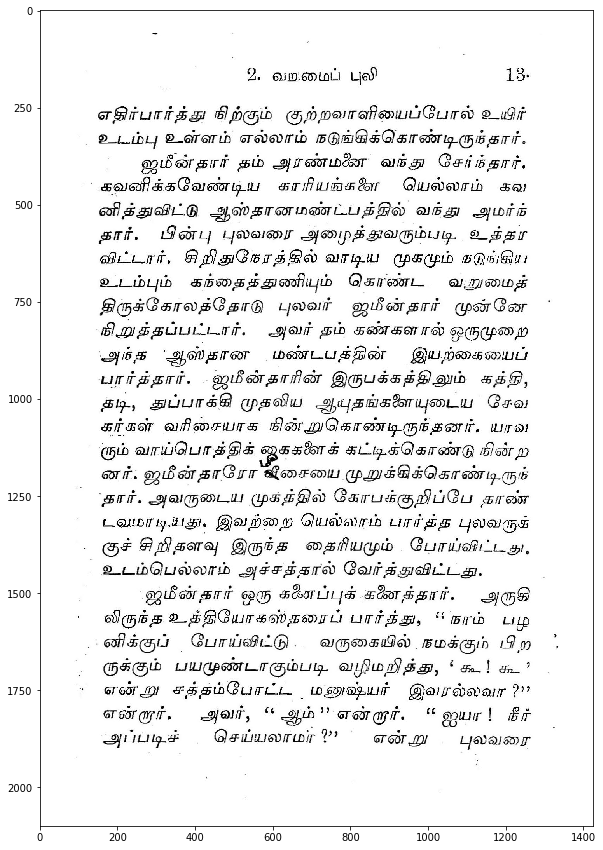

In [12]:
pagename = 'p16'
image = cv2.imread(pagename+'.png')
plt.figure(figsize=(10,15))
plt.imshow(image, cmap='gray')

## Step 6. Run tesseract on the page, telling it that it has eng and tam languages.

Please note that having the - - psm 6 makes the whole text into a single column segment, which avoids splitting of line due to excess space between words during typesetting/justification.

In [13]:
pagename = 'p16'
!tesseract {pagename}.png {pagename} -l tam+eng --psm 6 


!cat {pagename}.txt

Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
2. வறுமைப்‌ புலி 13:
எதிர்பார்த்து நிற்கும்‌ குற்றவாளியைப்போல்‌ உயிர்‌
உடம்பு உள்ளம்‌ எல்லாம்‌ நடுங்கக்கொண்டிருக்தார்‌.

ஜமீன்தார்‌ தம்‌ அரண்மனை வந்து சேர்ந்தார்‌.
கவனிக்கவேண்டிய காரியங்களை யெல்லாம்‌ கவ
னித்துவிட்டு ஆஸ்கானமண்ட்பத்தில்‌ வந்து அமர்ச்‌
தார்‌. பின்பு புலவரை அழைத்துவரும்படி. உக்தர
விட்டார்‌. சிறிதுநேரத்தில்‌ வாடிய முகமும்‌ நடுங்கு
உடம்பும்‌ கந்தைத்துணியும்‌ கொண்ட வறுமைத்‌
திருக்கோலத்தோடு புலவர்‌ ஜமீன்தார்‌ முன்னே :
கி௮ுத்தப்பட்டார்‌. அவர்‌ தம்‌ சண்களால்‌ ஒருமுறை
Jos ஆஸ்தான மண்டபத்தின்‌ இயற்கையைப்‌
பார்த்தார்‌. ஜமீன்தாரின்‌ இருபக்கத்திலும்‌ கத்தி,
தடி, துப்பாக்கி முதலிய ஆயுதங்களையடைய சேவ
கர்கள்‌ வரிசையாக நின்றுகொண்டிருக்கனர்‌. பரவ
ரும்‌ வாப்பொத்திக்‌ ஒக்களைக்‌ கட்டிக்கொண்டு கின்ற
னர்‌. ஜமீன்தாரோ உ&ீசையை முறுக்கக்கொண்டிருக்‌
.. தார்‌. அவருடைய முகத்தில்‌ கோபக்குறிப்பே தாண்‌
டவமாடியது. இவற்றை யெல்லாம்‌ பார்த்த புலவருக்‌
. குச்‌ சிறிதளவு இருந்த தைரியமும்‌ போய்விட்டத

## Step 7. Process all images from the book.

In [23]:
import subprocess

import glob
image_files = glob.glob('*.png')

num_pages = len(image_files)
for i in range(97,num_pages):
  print(i)
  infilename = str(i)+'.png'
  outfilename = str(i)
  print(infilename)
  output = subprocess.Popen("tesseract "+infilename+" "+outfilename+" -l tam+eng --psm 6",
                                    shell = True,
                                    stdout = subprocess.PIPE
      ).stdout.read()

97
97.png
98
98.png
99
99.png


## Step 8. Combine all texts into one output text file.

In [24]:
num_pages = len(glob.glob('p*.txt'))
num_pages

100

In [0]:
#fname = 'TVA_BOK_0000119_UVS_Naan_Kandathum_Kettathum.pdf'
oname = fname.replace('.pdf','_ocred_text.txt')
o=open(oname, 'w', encoding='utf-8')
txts = ['p'+str(i)+'.txt' for i in range(num_pages)]
for f in txts:
  text = open(f, encoding='utf-8').read()
  o.write('         '+str(f).replace('.txt','')+'   \n')
  o.write(text)
  o.write('=========\n')

## Step 9. Download the file to your desktop using google files.

In [0]:
files.download(oname)